##Kelvin Wake Probelm: Integration of $$\mathcal{I}_c(\phi,\rho)=\int_{-\pi/2}^{\pi/2}\cos\left(\rho\frac{\cos(\theta-\phi)}{\cos^2\theta}\right)d\theta$$##
In this note, we study an interesting problem which keeps a deep relation with nature. We are interested in making the V-shaped pattern that appear on the surface of water when either a ship advances in a deep water-body or a duck swims in the water body in a straight line. The angle formed in the V shape parameter is approximately $39\deg$. Following are the important references for this particular study:


1.   https://dlmf.nist.gov/36.13
2.   Ship wakes and Kelvin https://www.cambridge.org/core/services/aop-cambridge-core/content/view/2AEBE9063DA250C661870D73680C6FCC/S002211201400069Xa.pdf/ship-waves-and-kelvin.pdf
3.   William Thomson 1887 note entitiled as "On ship waves".

Lets do the coding now!

<ipython-input-75-ba83a87560c5>:25: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  z[i, j] = quad(func, -np.pi/2, np.pi/2, args=(rho, phi))[0]# This is I_c(phir,rho).
<ipython-input-75-ba83a87560c5>:25: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  z[i, j] = quad(func, -np.pi/2, np.pi/2, args=(rho, phi))[0]# This is I_c(phir,rho).


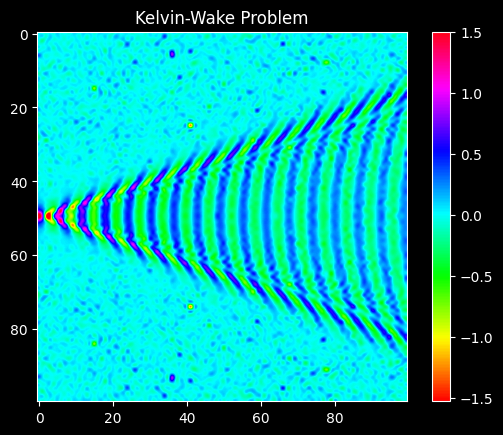

In [75]:
# Importing essential libraries and modules for integration
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# personal preference!
plt.style.use('dark_background')

# Subject is travelling to the left.
nx, ny = 100, 100
xgrid, ygrid = np.linspace(0, 100, nx), np.linspace(-50, 50, ny)
X, Y = np.meshgrid(xgrid, ygrid)

z = np.empty((ny, nx))

# Defininig the function of Kelvin-Wake height.
def func(theta, rho, phi):
    return np.cos(rho * np.cos(-theta-phi) / np.cos(theta)**2)

# Calculation of the interested integral for the Kelvin-Wake height.
for j, x in enumerate(xgrid):
    for i, y in enumerate(ygrid):
        rho = np.linalg.norm((x, y))
        phi = np.arctan2(y, x)
        z[i, j] = quad(func, -np.pi/2, np.pi/2, args=(rho, phi))[0]# This is I_c(phir,rho).

# Plot the integrals evaluated on the grid.
plt.imshow(z, interpolation="lanczos",cmap='hsv')
plt.title('Kelvin-Wake Problem')
plt.savefig("kelvin-wake.png")
plt.colorbar()

Let's plot the integral result on 3D-surface.

Text(0.5, 0.92, 'Kelvin-Wake Problem 3D')

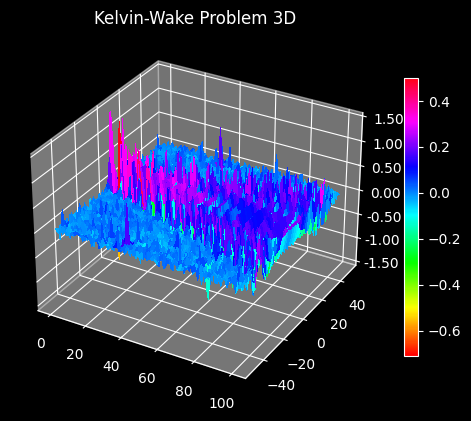

In [76]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator
#plt.style.use('dark_background')

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, z, cmap=cm.hsv,
                       linewidth=1, antialiased=False)
ax.zaxis.set_major_formatter('{x:.02f}')
fig.colorbar(surf, shrink=.75)
plt.savefig("kelvin-wake3D.png")
plt.title('Kelvin-Wake Problem 3D')

Now, we will focus on creating the individual parts of $V$ by integrating the function into two parts. This will be performed by splitting the limits integral from $-\pi/2$ to $0$ and then $0$ to $\pi/2$. That is:
\begin{align}
\mathcal{I}_c(\phi,\rho)=\int_{-\pi/2}^{\pi/2}\cos\left(\rho\frac{\cos(\theta-\phi)}{\cos^2\theta}\right)d\theta=\underbrace{\int_{-\pi/2}^{0}\cos\left(\rho\frac{\cos(\theta-\phi)}{\cos^2\theta}\right)d\theta}_\text{Part -1}+\underbrace{\int_{0}^{\pi/2}\cos\left(\rho\frac{\cos(\theta-\phi)}{\cos^2\theta}\right)d\theta}_{\text{Part-2}}.
\end{align}
Consider the Part-1 as follows:
\begin{align}
\int_{-\pi/2}^{0}\cos\left(\rho\frac{\cos(\theta-\phi)}{\cos^2\theta}\right)d\theta≡&\int_0^{\pi/2}\cos\left(\rho\frac{\cos(\theta+\phi)}{\cos^2\theta}\right)d\theta.
\end{align}
Therefore,
\begin{align}
\mathcal{I}_c(\phi,\rho)=&\int_{0}^{\pi/2}\cos\left(\rho\frac{\cos(\theta+\phi)}{\cos^2\theta}\right)d\theta+\int_{0}^{\pi/2}\cos\left(\rho\frac{\cos(\theta-\phi)}{\cos^2\theta}\right)d\theta\\
\implies\mathcal{I}_c(\phi,\rho)=&\int_{0}^{\pi/2}\left\{\cos\left(\rho\frac{\cos(\theta+\phi)}{\cos^2\theta}\right)+\cos\left(\rho\frac{\cos(\theta-\phi)}{\cos^2\theta}\right)\right\}d\theta.
\end{align}
Integrating both integrals as follows; first by the Part 1 integral:

<ipython-input-77-6250282c7231>:11: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  z_minus[i, j] = quad(func, 0, np.pi/2, args=(rho, phi))[0] # Integrating the Part 1.
<ipython-input-77-6250282c7231>:11: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  z_minus[i, j] = quad(func, 0, np.pi/2, args=(rho, phi))[0] # Integrating the Part 1.


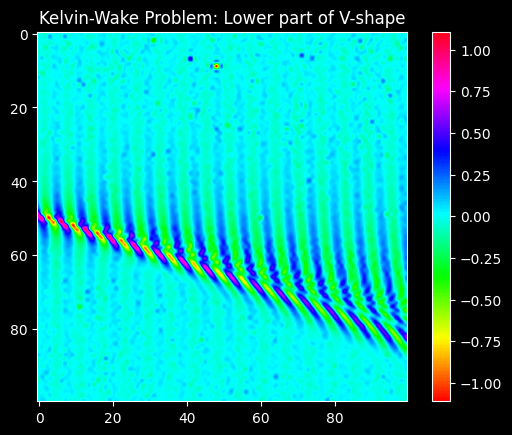

In [77]:
z_minus = np.empty((ny, nx))

# The following return function generates the lower part of the V-shape in the Kelvin wake probelm.
def func(theta, rho, phi):
    return 1*np.cos(rho * np.cos(theta+phi) / np.cos(theta)**2) # Definining the integrand of Part 1.

for j, x in enumerate(xgrid):
    for i, y in enumerate(ygrid):
        rho = np.linalg.norm((x, y))
        phi = np.arctan2(y, x)
        z_minus[i, j] = quad(func, 0, np.pi/2, args=(rho, phi))[0] # Integrating the Part 1.

plt.imshow(z_minus, interpolation="lanczos",cmap='hsv')
plt.title('Kelvin-Wake Problem: Lower part of V-shape')
plt.colorbar()
plt.savefig("kelvin-wake lower-part.png")

Now, we shall be integrating Part-2.

<ipython-input-78-0e0344f5fcb2>:11: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  z_plus[i, j] = quad(func, 0, np.pi/2, args=(rho, phi))[0] # Integrating the Part 2.
<ipython-input-78-0e0344f5fcb2>:11: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  z_plus[i, j] = quad(func, 0, np.pi/2, args=(rho, phi))[0] # Integrating the Part 2.


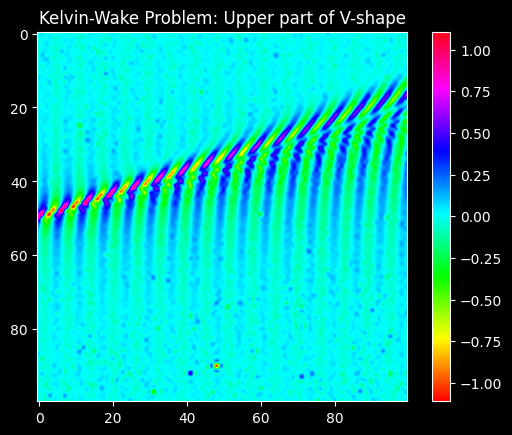

In [78]:
z_plus = np.empty((ny, nx))

# The following return function generates the upper part of the V-shape in the Kelvin wake probelm.
def func(theta, rho, phi):
    return 1*np.cos(rho * np.cos(theta-phi) / np.cos(theta)**2) # Definining the integrand of Part 2.

for j, x in enumerate(xgrid):
    for i, y in enumerate(ygrid):
        rho = np.linalg.norm((x, y))
        phi = np.arctan2(y, x)
        z_plus[i, j] = quad(func, 0, np.pi/2, args=(rho, phi))[0] # Integrating the Part 2.

plt.imshow(z_plus, interpolation="lanczos",cmap='hsv')
plt.title('Kelvin-Wake Problem: Upper part of V-shape')
plt.colorbar()
plt.savefig("kelvin-wake upper-part.png")

Let's combine both parts and see the result.

In [79]:
z_combine=z_minus+z_plus

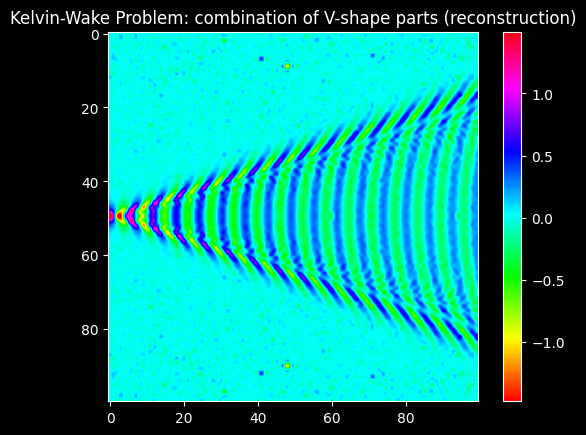

In [80]:
plt.imshow(z_combine, interpolation="lanczos",cmap='hsv')
plt.title('Kelvin-Wake Problem: combination of V-shape parts (reconstruction)')
plt.colorbar()
plt.savefig("kelvin-wake combination of both parts.png")

It is interesting to know that
\begin{align}
\mathcal{I}_c\left(\phi,\rho\right)=\mathcal{I}_s\left(\phi,\rho\right)
\end{align}
where $\mathcal{I}_s\left(\phi,\rho\right)$ is defined as follows:
\begin{align}
\mathcal{I}_s\left(\phi,\rho\right)=&\int_{0}^{\pi/2}\left\{\cos\left(\rho\frac{\sin(\theta+\phi)}{\sin^2\theta}\right)+\cos\left(\rho\frac{\sin(\theta-\phi)}{\sin^2\theta}\right)\right\}d\theta\\
=&\underbrace{\int_0^{\pi/2}\cos\left(\rho\frac{\sin(\theta+\phi)}{\sin^2\theta}\right)d\theta}_{\text{Part-1'}}+\underbrace{\int_0^{\pi/2}\cos\left(\rho\frac{\sin(\theta-\phi)}{\sin^2\theta}\right)d\theta}_{\text{Part-2'}}.
\end{align}
By doing so, the respective integrals which used to provide the separate parts of the $V-$shaped Kelvin Wake will now be flipped. This is demonstrated in the following lines of coding. Note that the color map is now changed so that we have an ease of distinguishing the computation of respective integrals.

<ipython-input-81-94b49770c883>:11: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  z_upper_sin[i, j] = quad(func, 0, np.pi/2, args=(rho, phi))[0] # Integrating the Part 1'.
<ipython-input-81-94b49770c883>:11: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  z_upper_sin[i, j] = quad(func, 0, np.pi/2, args=(rho, phi))[0] # Integrating the Part 1'.


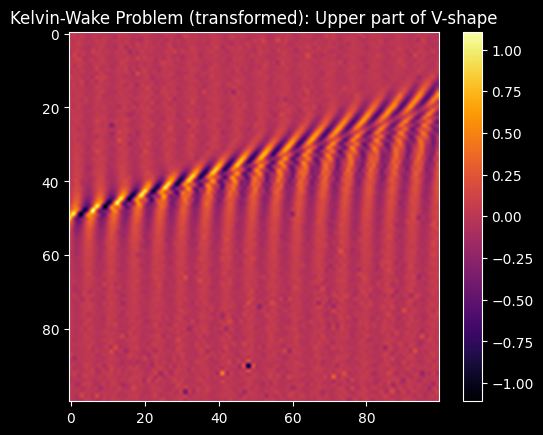

In [81]:
z_upper_sin = np.empty((ny, nx))

# The following return function generates the lower part of the V-shape in the Kelvin wake problem.
def func(theta, rho, phi):
    return 1*np.cos(rho * np.sin(theta+phi) / np.sin(theta)**2) # Definining the integrand of Part 1'.

for j, x in enumerate(xgrid):
    for i, y in enumerate(ygrid):
        rho = np.linalg.norm((x, y))
        phi = np.arctan2(y, x)
        z_upper_sin[i, j] = quad(func, 0, np.pi/2, args=(rho, phi))[0] # Integrating the Part 1'.

plt.imshow(z_upper_sin, interpolation="lanczos",cmap='inferno')
plt.title('Kelvin-Wake Problem (transformed): Upper part of V-shape')
plt.colorbar()
plt.savefig("kelvin-wake upper-part (transformed).png")

<ipython-input-82-5fcb78e67da0>:11: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  z_lower_sin[i, j] = quad(func, 0, np.pi/2, args=(rho, phi))[0] # Integrating the Part 2'.
<ipython-input-82-5fcb78e67da0>:11: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  z_lower_sin[i, j] = quad(func, 0, np.pi/2, args=(rho, phi))[0] # Integrating the Part 2'.


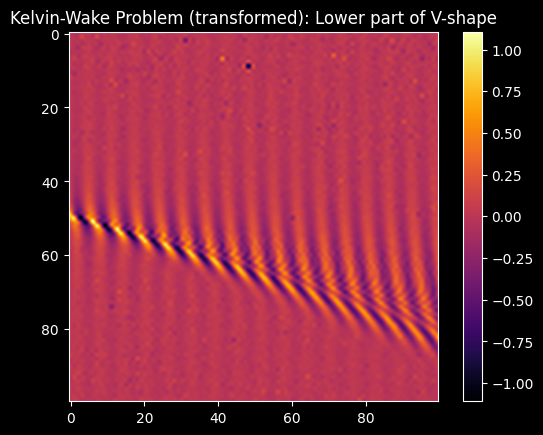

In [82]:
z_lower_sin = np.empty((ny, nx))

# The following return function generates the lower part of the V-shape in the Kelvin wake problem.
def func(theta, rho, phi):
    return 1*np.cos(rho * np.sin(theta-phi) / np.sin(theta)**2) # Definining the integrand of Part 2'.

for j, x in enumerate(xgrid):
    for i, y in enumerate(ygrid):
        rho = np.linalg.norm((x, y))
        phi = np.arctan2(y, x)
        z_lower_sin[i, j] = quad(func, 0, np.pi/2, args=(rho, phi))[0] # Integrating the Part 2'.

plt.imshow(z_lower_sin, interpolation="lanczos",cmap='inferno')
plt.title('Kelvin-Wake Problem (transformed): Lower part of V-shape')
plt.colorbar()
plt.savefig("kelvin-wake lower-part (transformed).png")